<a href="https://colab.research.google.com/github/Hiroki31730/Seminar/blob/main/Ana1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd
import numpy as np
import os
#Google colabではローカル環境にアクセスできないのでdiveと接続できるようにする
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
#0列目をインデックスとして、任意のcsvファイルを読み込む
df = pd.read_csv('/content/drive/MyDrive/Final.csv', index_col=0)

In [16]:
#読み込んだcsvファイルから'label'のカラム名を除いた範囲を選択する。
df[df.columns[df.columns != 'label']]

,mean,median,sum,var,std,max,min,range,skew,kurtosis,mode,second_label
/Users/a2252/New_Class/N1_Body_Off_A_0.wav,-0.000025,0.000000,-6.615540,0.000514,0.022675,0.447540,-0.413605,0.861145,0.426573,92.643558,0.000000,0
/Users/a2252/New_Class/N1_Body_Off_A_1.wav,0.000002,0.000000,0.566742,0.000250,0.015825,0.324890,-0.307465,0.632355,0.815117,71.592888,-0.000031,0
/Users/a2252/New_Class/N1_Body_Off_A_2.wav,-0.000011,-0.000031,-2.916687,0.000333,0.018251,0.388855,-0.393097,0.781952,0.550875,104.309844,0.000000,0
/Users/a2252/New_Class/N1_Body_Off_A_3.wav,-0.000018,0.000000,-4.756561,0.000346,0.018590,0.376495,-0.365540,0.742035,0.558077,97.310400,-0.000031,0
/Users/a2252/New_Class/N1_Body_Off_A_4.wav,-0.000018,0.000000,-4.821320,0.000301,0.017349,0.341156,-0.342194,0.683350,0.513570,82.766107,-0.000031,0
...,...,...,...,...,...,...,...,...,...,...,...,...
/Users/a2252/New_Class/N20_Neck_On_C_4.wav,-0.000013,0.000000,-3.357330,0.000132,0.011500,0.246613,-0.410614,0.657227,-3.936715,178.739758,0.000000,19
/Users/a2252/New_Class/N20_Neck_On_D_0.wav,-0.000017,-0.000031,-4.446747,0.000059,0.007693,0.200867,-0.251556,0.452423,-0.281815,179.811792,0.000000,19
/Users/a2252/New_Class/N20_Neck_On_D_1.wav,-0.000014,-0.000031,-3.646973,0.000078,0.008826,0.267059,-0.299835,0.566895,-0.367415,200.169569,0.000000,19
/Users/a2252/New_Class/N20_Neck_On_D_2.wav,-0.000011,0.000000,-2.911743,0.000129,0.011366,0.323700,-0.319580,0.643280,1.080641,161.062678,0.000000,19


In [17]:
from sklearn.model_selection import train_test_split

#読み込んでいるデータフレームから'second_label'を除いた全ての列と行をXに格納する。
X = df.loc[:, df.columns!='second_label']

#読み込んでいるデータフレームから'second_label'のみの列と行とYに格納する。
Y = df['second_label']

#X,Yをそれぞれ8:2の割合で、学習データとテストデータに分割する。
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print(len(X_train), len(X_test))

1540 386


In [18]:
from sklearn.linear_model import LogisticRegression

#小規模データセットに最適な'libliner'を選択
model = LogisticRegression(solver='liblinear')
#学習データを用いて学習させる
model.fit(X_train, Y_train)
#学習させたデータを用いて学習データとの一致率を計算
model.score(X_train, Y_train)
#学習したモデルを用いて目的変数を予測し、Y_predに保存する
Y_pred = model.predict(X_test)


from sklearn.metrics import accuracy_score
#テストデータと予測した目的変数の一致率を計算する
accuracy_score(Y_test, Y_pred)

0.46113989637305697

[[ 8  4  8  5  1  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1 20  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  1 16  4  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  7  7  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  1  0  7  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  8  8  6  2  1  0  1  1  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  0 16  0  2  1  0  2  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  6  0  3  1  2  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  5  1  1  3  1  0  0  2  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  2  1  5  0  0  0  0  2  0  0  0  0  0]
 [ 0  0  0  0  0  4  0  0  0  0  9  0  6  2  2  0  0  0  0  1]
 [ 0  0  0  0  0  0  1  0  2  2  0 18  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  4  1  4  0 10  0  3  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  1  4  1  6  3  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  2  2  1  0  6  5  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  9  6  4

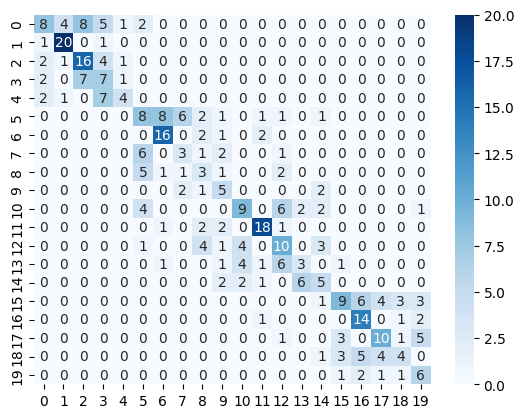

In [19]:
from sklearn.metrics import confusion_matrix as cm
import seaborn as sns
import matplotlib.pyplot as plt

#テストデータとY_predの混合行列を作成
conf = cm(Y_test, Y_pred)
print(conf)

#上記で作成した混合行列をヒートマップとして表示、保存する
sns.heatmap(conf, annot=True, cmap='Blues')
plt.savefig('/content/drive/MyDrive/sklearn_confusion_matrix.png')

In [7]:
#条件を設定
condition_1 = Y_pred <= 4
condition_2 = (5 <= Y_pred) & (Y_pred <= 9)
condition_3 = (10 <= Y_pred) & (Y_pred <= 14)
condition_4 = (15 <= Y_pred) & (Y_pred <= 19)

#条件に沿ってY_pred内の数値を置換する
Y_pred[condition_1] = 0
Y_pred[condition_2] = 1
Y_pred[condition_3] = 2
Y_pred[condition_4] = 3

In [8]:
Y_tvalue = Y_test.values

#条件を設定
condition_1 = Y_tvalue <= 4
condition_2 = (5 <= Y_tvalue) & (Y_tvalue <= 9)
condition_3 = (10 <= Y_tvalue) & (Y_tvalue <= 14)
condition_4 = (15 <= Y_tvalue) & (Y_tvalue <= 19)

#条件に沿ってY_pred内の数値を置換する
Y_tvalue[condition_1] = 0
Y_tvalue[condition_2] = 1
Y_tvalue[condition_3] = 2
Y_tvalue[condition_4] = 3

In [9]:
#Y_tvalueとY_predを比較するため、減算処理を行う
count_l = Y_tvalue - Y_pred
#減算した配列count_lの値が0の部分だけカウントする
count_zero = np.sum(count_l == 0)
#0だけカウントした値を全体の要素数で割ることで一致率が求められる。
accuraly = count_zero / len(count_l)
accuraly

0.9041450777202072